## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [23]:
X.shape

(178, 13)

In [24]:
X.dropna()
X.shape

(178, 13)

In [25]:
# поробовали выкинуть пропущенные значения: размер не изменился -> пропусков нет

In [26]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [27]:
# все типы данных числовые -> ничего кодировать не надо

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [33]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [34]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
52,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [41]:
# масштабируем признаки X_train:
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()
X_real_norm_np = normalizer.fit_transform(X_train[['alcohol', 'magnesium']])
X_newTrain = pd.DataFrame(data=X_real_norm_np)
X_newTrain.columns = ['alcohol', 'magnesium']
X_newTrain.head()

,alcohol,magnesium
0,0.964380,0.800003
1,0.778634,-0.392646
2,-1.202654,-1.024049
3,-0.831162,-0.883737
4,1.261573,1.501561


In [42]:
# масштабируем признаки X_test:
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()
X_real_norm_np = normalizer.fit_transform(X_test[['alcohol', 'magnesium']])
X_newTest = pd.DataFrame(data=X_real_norm_np)
X_newTest.columns = ['alcohol', 'magnesium']
X_newTest.head()

,alcohol,magnesium
0,0.722469,-0.849696
1,-0.716039,0.065161
2,-0.468020,-0.286707
3,-1.323684,0.839271
4,-1.026062,-1.342312


In [71]:
from sklearn.neighbors import KNeighborsClassifier

neighbours = [1, 3, 5, 10, 15, 25]
TrainedClassifiers = []
print('NN\tTrain\tTest')
for k in neighbours:
    print(k, end = '\t')
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_newTrain, y_train)
    TrainedClassifiers.append(clf) # для подсказки 5 из задачи 1.5
    for X_data, y_data in zip([X_newTrain, X_newTest], [y_train, y_test]):
        y_predicted = clf.predict(X_data)
        print(f"{np.mean(y_predicted==y_data):.2f}", end = '\t')
    print('')

NN	Train	Test
1	1.00	0.56	
3	0.83	0.61	
5	0.81	0.63	
10	0.79	0.54	
15	0.74	0.57	
25	0.76	0.56	


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [53]:
!pip install mlxtend

In [54]:
# все установилось

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [55]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. +
6. Построение графика может занять некоторое время – придётся немного подождать!

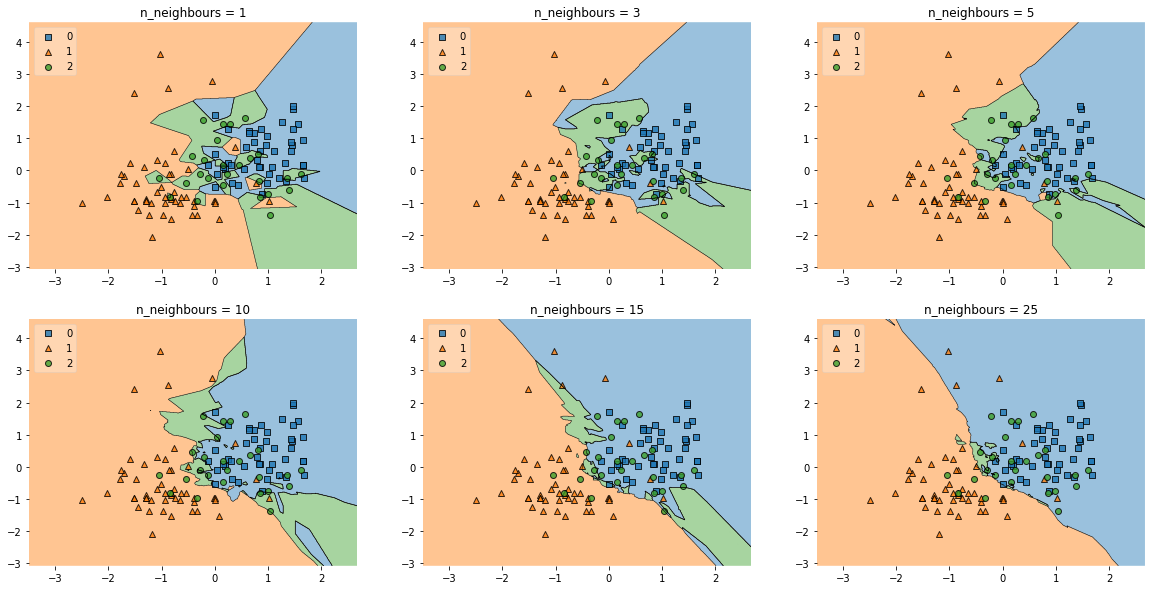

In [80]:
from mlxtend.plotting import plot_decision_regions
from itertools import product

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))

for classifier, a in zip(TrainedClassifiers, product([0, 1], [0, 1, 2])):
    ax = axs[a[0], a[1]]
    plot_decision_regions(np.array(X_newTrain), np.array(y_train), clf=classifier, legend=2, ax=ax)
    ax.set_title('n_neighbours = ' + str(neighbours[3 * a[0] + a[1]]))
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Самая высокая точность предсказания на тестовой выборке оказалсь для пяти соседей. Для этого числа получилось самое разумное
соотношение точности на тренировочной и тестовой выборках. Для меньших значений нашего гиперпараметра (числа соседей)
выходила высокая точность на тренировочной выборке, что может судить о переобучении модели -> низкая точность предсказания на 
тестовой выборке. При больших значениях числа соседей результат тоже не очень хороший, так как, на самом деле, у нас 
не так много данных (всего 178) и большое количество соседей, на которых мы смотрим, может сбивать наше предсказние: 
вдруг рядом с нашей точкой находится 5 зеленых точек (очень близко), тогда бы мы хотели сказать, что наше предсказание 
-- зеленый, но мы смотрим на 25 соседей, а не на пять, и может окзаться так, что подальше от рассматриваемой точки мы найдем
скопление из 20 синих точек. Тогда нам придется раскрасить рассматриваемую точку в синий цвет. Проблема в том, что соседи дают
одинаковый вклад в результат, вне зависимости от расстояния. Если уж мы хотим брать большое число соседей, то нужно уменьшать 
вклад от далеких точек и увеличиват от близких (например, ввести функцию, которая большая при маленьких значения расстояния 
и маленькая при больших значениях расстояния: что-то типо $e^{-r^2}$, и использовать ее как вескаждой точки относительно
рассмариваемой).

Касательно картинок: признак хорошего классификатора -- это отсутствие непонятных крошечных островков иного цвета, гладкость границ областей и остуствие узких зон. Смотря на распределние данных, хочется сказать, что посередине хотелось бы увидеть зеленое пятно, слева и слева-сверху должны быть оранжевые зоны, а в остальных местах -- синие. Самые гладкие и приятные на взгляд границы получились для 25 соседей, но при этом мы видим явную несправедливость по отношению к зеленому цвету в центре картинки, а также хотелось бы, чтобы слева-сверху все-таки была оранжевая зона, а не синяя. Под наибольшее количество вышеупомянутых мной критериев, на мой взгляд, попадает картинка для пяти соседей. Единственная ее проблема в том, что нижний левый угол зеленый, а хотелось бы видеть его синим.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

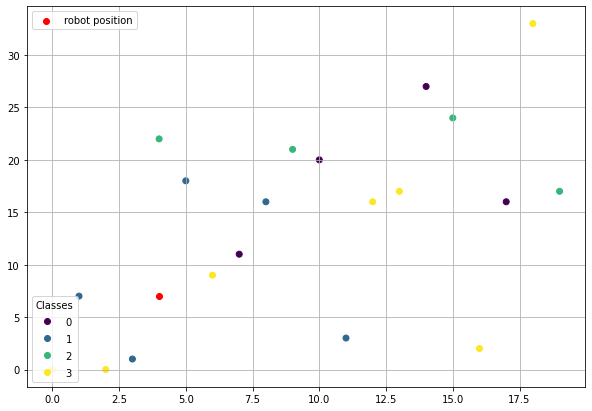

In [81]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(landmarks, classes)
        self.knn = clf
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        
        s = np.random.binomial(1, 0.2)
        if s == 1:
            new_position = self.trajectory[-1] + [1, 0]
            self.trajectory.append(new_position)
        if s == 0:
            predicted = self.knn.predict(np.array(self.trajectory[-1]).reshape(1, -1))
            new_position = self.trajectory[-1] + self.mapping[int(predicted)]
            self.trajectory.append(new_position)

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [141]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

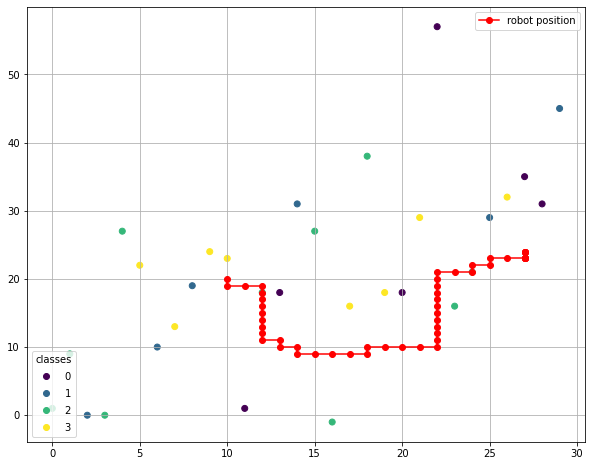

In [151]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

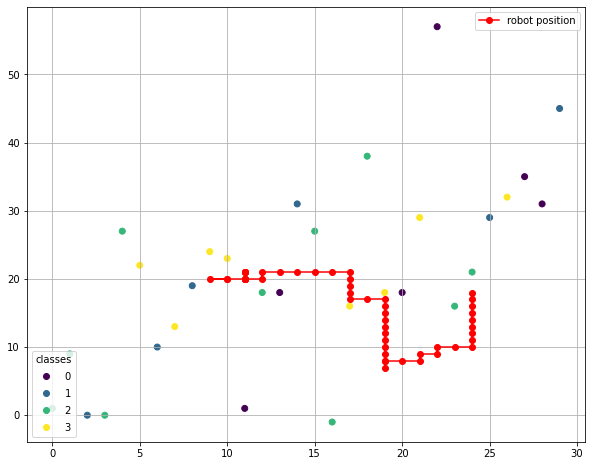

In [159]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

In [160]:
# образуются некоторые аппендиксы, так как происходит следующая ситуация: ближайший сосед - 2 -> двигаемся вверх. На новой
# позиции ближайший сосед стал класса 3 -> двигаемся вниз. Итого попали бы в бесконечный цикл, если бы робот не двигался вправо
# с вероятностью 0.2

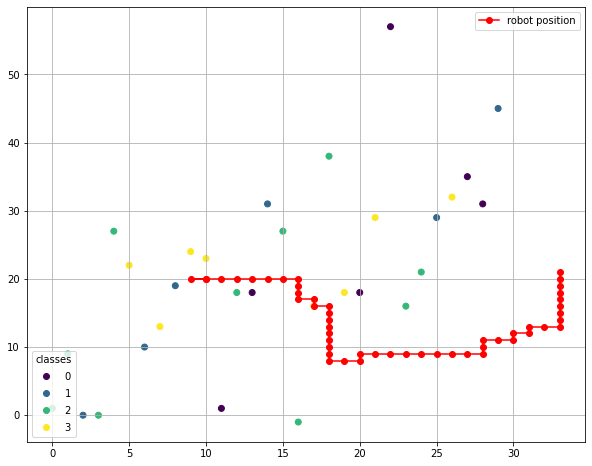

In [161]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)

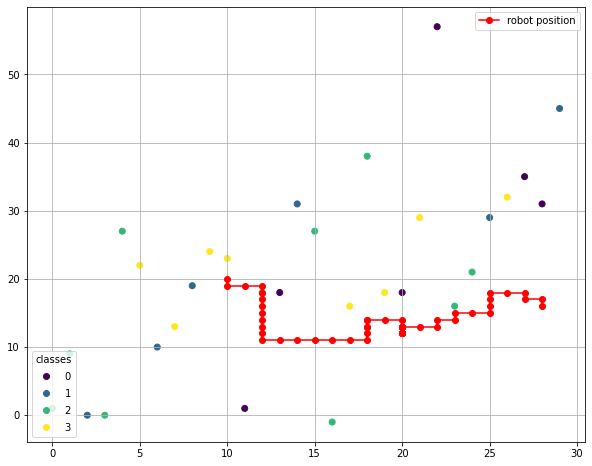

In [162]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

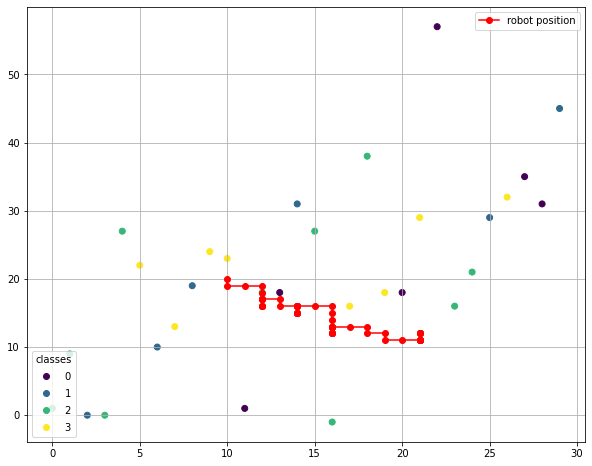

In [163]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50)

In [164]:
# здесь также получается много зацикленных действий, то есть робот ходит туда-сюда по местам, где уже был. Поэтому здесь путь
# получился коротким (много раз робот оказывается на позиции, где он уже был)

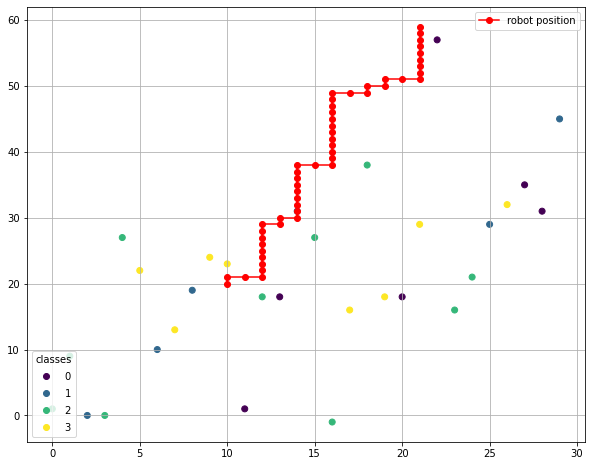

In [165]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)

In [166]:
# всего меток 30, смотрим на 30 соседей. Из передвижений робота видно, что преобладающий класс - 2, поэтому робот почти
# все время двигается вверх (иногда вправо, так как вероятность knn - 0.8, движение вправо - 0.2)

In [167]:
# итого, на самом деле, от выбора числа соседей много что зависит - получаются разные траектории

In [168]:
# если бы мы расставляли метки и присваивали им классы осмысленно, то мы бы могли контролировать траекторию движения робота, но
# при этом абсолютно не факт, что мы так можем получить любую кривую (в данном случае некую дискретную ломаную). То есть 
# врзникает такой интересный вопрос: существует ли кривая (траектория), которая не может быть получена при любой расстановке
# меток

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [175]:
!pip install opendatasets

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=d277511dd3825cfe526c82b9fe1ba8c6cbb8088b4749dcd39d6eedd7af60e423
  Stored in directory: c:\users\решин кирилл\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [179]:
import opendatasets as od

In [189]:
od.download("https://www.kaggle.com/shivam2503/diamonds")

Skipping, found downloaded files in ".\diamonds" (use force=True to force download)


In [ ]:
# скачали датасет -> посмотрели куда он скачался -> скопировали полный путь

In [249]:
data = pd.read_csv(r'C:\Users\Решин Кирилл\ИАД\diamonds\diamonds.csv', sep=',',  na_values=["?"])
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [250]:
# способ 1: есть ли на каком-то месте пропущенное значение
data.isnull().any().any()

False

In [251]:
# способ 2: сколько всего пропущенных значений:
data.isnull().sum().sum()

0

In [252]:
# способ 3: сравнить размер до выкидывания пропущенных значений и после:
data.dropna().shape == data.shape

True

In [253]:
# итого пропусков нет

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [254]:
# Очевидно, таким столбцом является index counter (первый столбец)
data = data.drop(["Unnamed: 0"], axis = 1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [255]:
NumericData = data._get_numeric_data()
NumericData.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [256]:
NumericData.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [257]:
# с нашей целевой переменной price больше всего коррелирует признак carat. Размер (то есть признаки x, y и z) тоже довольно
# существенно влияет на стоимость

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [258]:
data.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [259]:
X_dum = pd.get_dummies(data, drop_first=True)
print(X_dum.shape)
X_dum.head()

(53940, 24)


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [260]:
y = X_dum['price']
X = X_dum.drop('price', axis=1)
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [261]:
X_train.shape

(37758, 23)

In [262]:
X_test.shape

(16182, 23)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [301]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = pd.DataFrame(data=sc.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(data=sc.transform(X_test), columns=X.columns)

In [302]:
X_train_scaled.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.551161,-0.877055,-0.205037,0.798862,0.746942,0.646307,-0.31549,1.223813,-0.588096,-0.534659,...,2.338296,-0.336376,-0.233234,-0.184732,-0.565341,-0.454528,-0.421884,1.837587,-0.269462,-0.319684
1,-0.843309,0.316493,-1.100283,-0.877887,-0.839477,-0.818309,-0.31549,1.223813,-0.588096,-0.534659,...,-0.427662,-0.336376,-0.233234,-0.184732,-0.565341,-0.454528,-0.421884,-0.544192,-0.269462,3.128085
2,-0.822180,-2.070604,2.033079,-0.770861,-0.770125,-0.959138,-0.31549,-0.817118,1.700404,-0.534659,...,-0.427662,-0.336376,-0.233234,-0.184732,1.768845,-0.454528,-0.421884,-0.544192,-0.269462,-0.319684
3,-1.054592,0.737746,-0.205037,-1.288156,-1.290263,-1.212629,-0.31549,1.223813,-0.588096,-0.534659,...,-0.427662,-0.336376,-0.233234,-0.184732,-0.565341,-0.454528,2.370317,-0.544192,-0.269462,-0.319684
4,0.614546,-0.245176,-0.652660,0.781024,0.781618,0.744887,-0.31549,1.223813,-0.588096,-0.534659,...,2.338296,-0.336376,-0.233234,-0.184732,1.768845,-0.454528,-0.421884,-0.544192,-0.269462,-0.319684


In [303]:
X_test_scaled.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.033463,0.878163,-0.205037,-1.261399,-1.264256,-1.170381,-0.31549,-0.817118,1.700404,-0.534659,...,-0.427662,-0.336376,-0.233234,-0.184732,-0.565341,-0.454528,2.370317,-0.544192,-0.269462,-0.319684
1,-0.716539,-0.315385,-1.100283,-0.672753,-0.640091,-0.677481,-0.31549,1.223813,-0.588096,-0.534659,...,-0.427662,-0.336376,-0.233234,-0.184732,-0.565341,2.200084,-0.421884,-0.544192,-0.269462,-0.319684
2,0.868086,0.456911,0.242586,0.977240,0.911652,0.998379,-0.31549,-0.817118,-0.588096,1.870351,...,2.338296,-0.336376,-0.233234,-0.184732,1.768845,-0.454528,-0.421884,-0.544192,-0.269462,-0.319684
3,-0.822180,0.246285,-0.205037,-0.886806,-0.822139,-0.818309,-0.31549,1.223813,-0.588096,-0.534659,...,-0.427662,-0.336376,-0.233234,-0.184732,-0.565341,-0.454528,-0.421884,1.837587,-0.269462,-0.319684
4,0.213108,0.737746,-1.100283,0.415350,0.365508,0.477313,-0.31549,1.223813,-0.588096,-0.534659,...,-0.427662,-0.336376,4.287535,-0.184732,-0.565341,-0.454528,-0.421884,1.837587,-0.269462,-0.319684


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [266]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [267]:
lr = LinearRegression().fit(X_train_scaled,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_scaled))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test_scaled))))

Train: 1270791.8536412274
Test: 1291193.8989862846


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [268]:
lr.coef_

array([ 5.30771734e+03, -9.09093019e+01, -6.30227446e+01, -1.08975649e+03,
        3.46573300e-01, -4.02044976e+01,  1.77312094e+02,  4.20765029e+02,
        3.44490788e+02,  3.11980757e+02, -8.79414334e+01, -1.05976741e+02,
       -2.04567200e+02, -3.53412331e+02, -4.52127949e+02, -5.25758304e+02,
        9.59220402e+02,  1.59252523e+03,  1.03876169e+03,  1.65936272e+03,
        1.81447342e+03,  1.28019653e+03,  1.45614766e+03])

In [ ]:
# вещественные переменные - первые 6. Заметим, что при признаках carat и x коэффициенты порядка 10^3

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [276]:
ridge = Ridge(10).fit(X_train_scaled,y_train)
print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train_scaled))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test_scaled))))
ridge.coef_

Train: 1270916.082830048
Test: 1291165.5530996118


array([ 5.27062394e+03, -8.92949508e+01, -6.32147645e+01, -1.04945960e+03,
       -1.69640599e+00, -4.35431682e+01,  1.77606753e+02,  4.21414874e+02,
        3.45135106e+02,  3.12910240e+02, -8.75254674e+01, -1.05754746e+02,
       -2.03967801e+02, -3.52511301e+02, -4.50784438e+02, -5.24434272e+02,
        9.46853565e+02,  1.56221705e+03,  1.01293591e+03,  1.63403088e+03,
        1.78495244e+03,  1.26282839e+03,  1.43588928e+03])

In [277]:
lasso = Lasso(10).fit(X_train_scaled,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lasso.predict(X_train_scaled))))
print ("Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test_scaled))))
lasso.coef_

Train: 1330860.8350128643
Test: 1341488.7419707496


array([4825.59188872, -100.0458139 ,  -73.61293405, -659.97642722,
         -0.        ,  -33.74813228,   48.46680583,  207.41663425,
        152.77364915,  136.2378795 ,  -17.84377081,  -39.29385265,
       -126.93390085, -280.70595188, -379.28446824, -465.59280138,
        645.5805766 ,  859.33531385,  402.43232465, 1038.78199543,
       1096.74282764,  845.65605958,  955.79345957])

In [ ]:
# заметим, что коэффициенты поменялись не очень сильно. Регуляризация справляется с проблемой мультиколлинеарности и штрафует 
# за большие веса. Раз тут коэффициенты не сильно изменились, то изначально проблема мультиколлинерности проявлялась не сильно

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

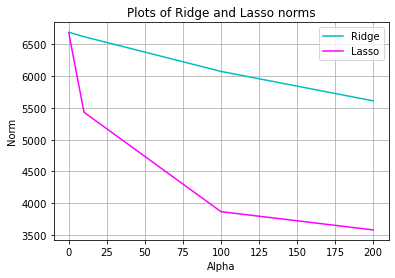

In [288]:
alpha = [0.1, 1, 10, 100, 200]
ridge_graph = []
lasso_graph = []
for a in alpha:
    ridge = Ridge(a).fit(X_train_scaled,y_train)
    norm1 = np.linalg.norm(ridge.coef_)
    ridge_graph.append(norm1)
    lasso = Lasso(a).fit(X_train_scaled,y_train)
    norm2 = np.linalg.norm(lasso.coef_)
    lasso_graph.append(norm2)

x = np.array(alpha)
y = np.array(ridge_graph)
z = np.array(lasso_graph)

plt.plot(x, y, 'c', linestyle = '-')
plt.plot(x, z, 'magenta', linestyle = '-')
plt.xlabel("Alpha")
plt.ylabel("Norm") 
plt.title("Plots of Ridge and Lasso norms")
plt.legend(['Ridge', 'Lasso'])
plt.grid()
plt.show()

In [ ]:
# из графика видно, что Lasso агрессивнее уменьшает веса

In [ ]:
# для Lasso-регрессии свойсвенна следующая картина: коэффициенты пропорциональны важности соответствующих признаков. Тогда
# менее значимые переменные будут давать маленький вклад, так как коэффициенты при них будут почти нулевыми, а более значимые
# признаки будут существенно влиять на предсказание. Как итог у нас будет некий отбор признаков.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [291]:
from sklearn.linear_model import LassoCV

reg = LassoCV(cv=5, alphas = [0.1, 1, 10, 100, 200]).fit(X_train_scaled,y_train)
print(reg.alphas_) # в обратном порядке вывелось
reg.mse_path_

[2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2615960190.1722336, tolerance: 47919147.97014151
  model = cd_fast.enet_coordinate_descent_gram(


array([[2161469.10426902, 2127189.12627402, 2218277.72098816,
        2139076.48312592, 2133937.39183257],
       [1805084.15152028, 1774615.89530258, 1833230.32471601,
        1751819.17634241, 1761304.64398908],
       [1373500.87455861, 1304373.0439466 , 1397425.60539913,
        1291993.22808699, 1306896.78762782],
       [1314026.90738201, 1235591.88010057, 1329420.57648841,
        1251027.95974164, 1250739.2746493 ],
       [1312841.86343224, 1235078.02543641, 1382755.18907739,
        1253364.26133939, 1251044.81362588]])

In [296]:
np.array(list(map(lambda x: np.mean(x), reg.mse_path_)))

array([2155989.96529793, 1785210.83837407, 1334837.90792383,
       1276161.31967239, 1287016.83058226])

In [ ]:
# итого оптимальный вариант - предпоследний, то есть для alpha = 1

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [297]:
lasso = Lasso(1).fit(X_train_scaled,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lasso.predict(X_train_scaled))))
print ("Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test_scaled))))
lasso.coef_

Train: 1271401.1595637114
Test: 1290690.876729883


array([ 5259.4791213 ,   -91.83608232,   -64.07922474, -1046.56471126,
          -0.        ,   -39.46981302,   164.53214541,   399.61834698,
         325.47709294,   294.56635349,   -80.9352898 ,   -99.31111561,
        -196.80425334,  -346.14315637,  -444.84146084,  -519.73731087,
         927.47546581,  1518.31278124,   974.35559573,  1596.56154606,
        1741.83582654,  1236.22131221,  1405.51475084])

In [ ]:
# итак, уже было сказано, что информативность признаков прямо пропорциональна модулю величины коэффициентов ->
# самые информативные - это carat и x из вещественных признаков. Логично, что чем больше значение признака carat, тем выше
# стоимость, однако, не совсем понятно, почему при увеличении x price уменьшается (коэффициент же отрицательный), казалось бы,
# чем больше размер, тем лучше? (Возможно, слишком большой размер бриллианта сильно снижает его чистоту, а следовательно,
# и стоимость). Чистота бриллинта тоже сильно влияет на стоимость (прямая пропорциональность)(хотя и не понятно, почему у всех
# значений признака clarity такой большой вес, примерно равный по значениям, а не разный, что было бы логичнее). 
# Переменная y совсем не влияет на результат, z слабо влияет. Также не очень сильно влияют признаки depth и table.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [304]:
print ("Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test_scaled))))
print('В задаче 3.7: Test: 1291193.8989862846')

Test: 1290690.876729883
В задаче 3.7: Test: 1291193.8989862846


In [ ]:
# Нуу, Lasso-регрессии дает результат немного лучше. 
# Возможно, без регрессии классификатор более чувствителен к крайне маленьким изменениям в признаках объекта, 
# а значит, немного переобучен (ну тут это не сильно проявляется, наверное, если разница такая крошечная)
# Скорее мы брали плохой шаг и нужно очень аккуртно охотиться за alpha (шагом), который подойдет нам лучше. Итого тут 
# регуляризация не очень помогла (конкретно с таким шагом)